**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd

**Reading the Dataset**

In [ ]:
rdata = pd.read_csv("Regression_Datatset_batch2.csv")
rdata

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


**Finding null values**

In [ ]:
rdata.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

**Converting catogorical values to numeric values**

In [ ]:
df = pd.DataFrame(rdata)

In [ ]:
df['driveway'] = df.driveway.map(dict(yes=1, no=0))
df['recroom']= df.recroom.map(dict(yes=1, no=0))
df['fullbase'] = df.fullbase.map(dict(yes=1, no=0))
df['gashw'] = df.gashw.map(dict(yes=1, no=0))
df['airco'] = df.airco.map(dict(yes=1, no=0))	
df['stories'] = df.stories.map(dict(one=1, two=2, three=3, four=4))
df['prefarea'] = df.prefarea.map(dict(yes=1, no=0))

In [ ]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


**Correlation Matrix**

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
corm = df.corr()

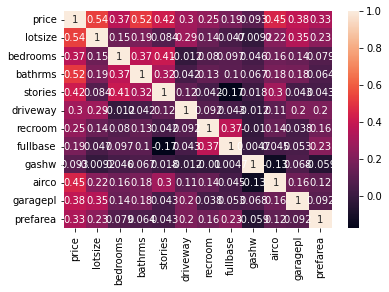

In [ ]:
sns.heatmap(corm, annot = True)
plt.show()

In [ ]:
cor = df.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target >= 0.4]
relevant_features

price      1.000000
lotsize    0.535796
bathrms    0.516719
stories    0.421190
airco      0.453347
Name: price, dtype: float64

In [ ]:
print(df[["lotsize","bathrms","stories","airco"]].corr())


          lotsize   bathrms   stories     airco
lotsize  1.000000  0.193833  0.083675  0.221765
bathrms  0.193833  1.000000  0.324066  0.184955
stories  0.083675  0.324066  1.000000  0.296216
airco    0.221765  0.184955  0.296216  1.000000


**Splitting data in training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df[[ 'lotsize',	'bathrms', 'bedrooms','airco']]
y = df[['price']]

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Length of x_train = ",len(x_train))
print("Length of x_test = ",len(x_test))
print("Length of y_train = ",len(y_train))
print("Length of y_test = ",len(y_test))

Length of x_train =  409
Length of x_test =  137
Length of y_train =  409
Length of y_test =  137


In [ ]:
x_train

,lotsize,bathrms,bedrooms,airco
167,2800,1,3,0
368,16200,3,5,0
301,8080,1,3,1
493,8400,1,2,0
382,13200,1,3,1
...,...,...,...,...
71,3150,1,3,0
106,3720,1,2,1
270,3640,2,3,0
435,5300,2,4,1


In [ ]:
x_test

,lotsize,bathrms,bedrooms,airco
316,5000,1,3,0
77,3180,1,4,1
360,6600,2,4,1
90,6060,1,3,0
495,5985,1,3,0
...,...,...,...,...
172,2430,1,3,0
124,4120,1,2,0
388,6540,1,3,0
460,2145,1,3,0


In [ ]:
y_train

,price
167,38000.0
368,145000.0
301,56000.0
493,54000.0
382,140000.0
...,...
71,51000.0
106,48000.0
270,60000.0
435,75000.0


In [ ]:
y_test

,price
316,80000.0
77,47000.0
360,130000.0
90,47000.0
495,59000.0
...,...
172,38000.0
124,70000.0
388,85000.0
460,47600.0


**Fitting data in model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#reg = LinearRegression().fit(scaledX,y)

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train,y_train)

0.5356013484597608

**Prediction of data**

In [ ]:
y_train_pred = reg.predict(x_train).sum(axis=1)
y_train_pred

array([ 47223.5400766 , 156395.49988197,  88411.20956624,  69417.83009817,
       113530.25689736,  60117.41929569,  48027.39135526,  85822.29422255,
        50755.90610754,  64198.14746531,  93415.76416738,  45261.11450385,
        67829.37798105,  53110.81679483, 102620.28330972,  46064.96578251,
        56809.24579329,  77022.5985832 ,  48793.48053479,  42925.08486612,
        83858.38223748,  61530.36570806,  68810.22137678,  54307.15318804,
        46040.43546285,  72636.95124363,  51884.30081186,  95598.06922603,
        85981.44513829,  79972.77960344,  71221.10475517,  74949.71334338,
        54092.0295812 ,  44010.06820123,  87264.303203  ,  85540.26877507,
        52963.63487687,  52540.97017257,  64277.76150991,  82254.09933176,
        73496.77521339,  42925.08486612,  76176.22932635,  56624.3017762 ,
        61568.12780719,  88264.02764829,  49842.63501004,  50559.66355026,
        50412.48163231,  47507.34857848,  78334.89745637,  94642.28015035,
        79358.62822093,  

In [ ]:
y_test_pred = reg.predict(x_test).sum(axis=1)
y_test_pred

array([ 58016.88072669,  69651.16429697, 102865.58650631,  63217.30849446,
        62849.35369957,  52914.57423755,  65258.97429628,  50412.48163231,
        99921.9481472 ,  57054.54898988,  68957.77268538,  79977.16609186,
        47616.02519114,  42287.29655498,  78206.59658797,  93788.99884172,
        75085.59672114,  45966.84450388,  97223.61298467,  62334.21698672,
        37214.42644944,  60396.69112429,  91114.30060783,  48381.37116452,
        61941.73187218,  48499.11669888,  59931.50844179,  60824.63570804,
       100529.55686858,  58065.94136601,  48297.22487151,  67829.00859041,
        74693.1116066 ,  94427.15654351,  67946.01091861,  57152.67026852,
        41158.90185065,  63119.18721582,  65866.58301766,  99921.9481472 ,
        53391.94885127,  99484.78888174,  41581.56655496,  51001.20930413,
        78697.20298116,  50412.48163231,  49382.20820661,  65983.58534586,
        45790.22620233,  88755.00343212,  45378.11683205,  79033.71540461,
        77641.13645413,  

**Regression Intercept**

In [ ]:
print('Regression intercept : ',reg.intercept_)

Regression intercept :  [1211.87351447]


**Regression coefficient**

In [ ]:
print('Regression Coefficients: ', reg.coef_)

Regression Coefficients:  [[4.90606393e+00 1.64356836e+04 5.27966800e+03 1.52836519e+04]]


**Calculating MSE**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('MSE test: ', mean_squared_error(y_test, y_test_pred))

MSE test:  304608782.4691443


In [ ]:
print('MSE train: ', mean_squared_error(y_train, y_train_pred))

MSE train:  316779660.3845579


**Calculating R2**

In [ ]:
print('R^2 train: ', r2_score(y_train, y_train_pred))

R^2 train:  0.5356013484597608


In [ ]:
print('R^2 test: ', r2_score(y_test, y_test_pred))

R^2 test:  0.6192615383062394


**Summery of model**

In [ ]:
import statsmodels.api as sm
res=sm.OLS(y,x).fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2182.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        06:28:15   Log-Likelihood:                         -6115.1
No. Observations:                 546   AIC:                                  1.224e+04
Df Residuals:                     542   BIC:                                  1.226e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


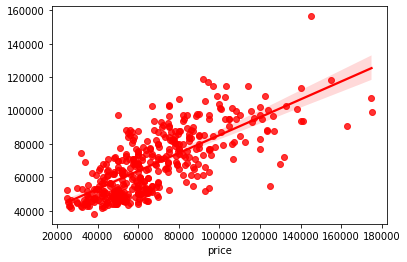

In [ ]:
sns.regplot(y_train,y_train_pred,color='red')